Definition from ChatGPT: 

![alternative text](data/linear_regression_chatgpt.png)


In [88]:
from torch import nn
import torch
import numpy as np
from matplotlib.pylab import plt
from torch.utils.data import Dataset, DataLoader

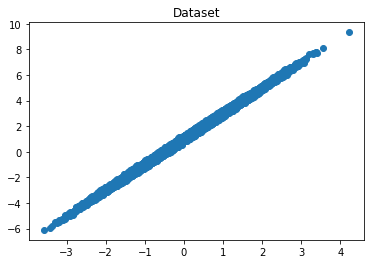

In [134]:
X = torch.randn(15000, 1)
gW = 2 
gb = 1
Y = gW * X + gb + (torch.randn(15000, 1)/10)

plt.scatter(X,Y)
plt.title("Dataset")
plt.show()

In [94]:
class CustomDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X.clone().detach()
        self.Y = Y.clone().detach()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    
dataset = CustomDataset(X,Y)


In [103]:
# Splitting dataset 

train_size  = int(len(X) * 0.9 )
valid_test_size  = int(0.1*len(X))

full_dataset = (X,Y)
train_dataset, valid_test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_test_size])
valid_dataset, test_dataset = torch.utils.data.random_split(valid_test_dataset, [valid_test_size//2, valid_test_size//2])



batch_size = 32
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)


In [111]:
class LinearRegression(nn.Module):
    
    def __init__(self):
        super(LinearRegression, self).__init__()
        
        self.linear = nn.Linear(1,1)
    
    def forward(self, x ): 
        return self.linear(x) 
    
    
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

train_losses = []
val_losses   = []

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_data_loader:
        optimizer.zero_grad()
        output = model(inputs) # forward prop
        loss = criterion(output,labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    train_losses.append(train_loss/len(train_data_loader))
        
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_input, val_labels in valid_data_loader:
            output = model(val_input) # forward prop
            val_loss += criterion(output,val_labels).item()
            
        val_losses.append(val_loss/len(valid_data_loader))
    
    if (epoch + 1)%2==0:
        print(f'epoch {epoch+1}, train loss:{train_losses[-1]:.4f} , valid loss:{val_losses[-1]:.4f}')
    


epoch 2, train loss:0.7138 , valid loss:0.2812
epoch 4, train loss:0.0346 , valid loss:0.0186
epoch 6, train loss:0.0109 , valid loss:0.0100
epoch 8, train loss:0.0100 , valid loss:0.0096
epoch 10, train loss:0.0100 , valid loss:0.0095
epoch 12, train loss:0.0100 , valid loss:0.0096
epoch 14, train loss:0.0100 , valid loss:0.0096
epoch 16, train loss:0.0100 , valid loss:0.0096
epoch 18, train loss:0.0100 , valid loss:0.0095
epoch 20, train loss:0.0100 , valid loss:0.0095


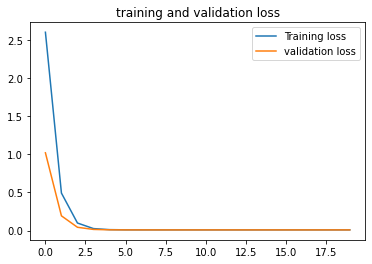

In [109]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.title("training and validation loss")
plt.legend(["Training loss","validation loss"])
plt.show()

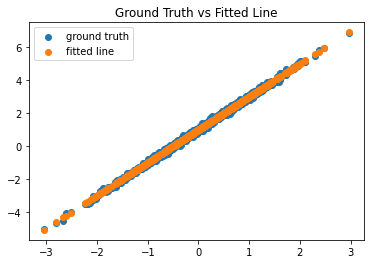

In [132]:
Xs = []
ys = []
preds = []
for x,y in test_dataset:
    with torch.no_grad():
        pred = model(x).detach().numpy()
        Xs.append(x.detach().numpy())
        ys.append(y.detach().numpy())
        preds.append(pred)

plt.scatter(Xs,ys)
plt.scatter(Xs,preds)
plt.title("Ground Truth vs Fitted Line")
plt.legend(["ground truth","fitted line"])
plt.show()

In [133]:
params = model.parameters()
w = next(params).detach().squeeze().numpy()
b = next(params).detach().squeeze().numpy()
print(f'true w: {gW:.4f} and true b: {gb:.4f}')
print(f'estimated w: {w:.4f} and estimated b: {b:.4f}')

true w: 2.0000 and true b: 1.0000
estimated w: 2.0001 and estimated b: 0.9978
